In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize

#perform doc2vec embeddings on comments with gensim
#ensure nltk.download('punkt') and nltk.download('punkt_tab') have been downloaded
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

import matplotlib.pyplot as plt

In [9]:
#read in the data
data = pd.read_csv('comments.csv',header=None,names=['comment'])
n_samples = 13871
sample_data = data['comment'][:n_samples]

In [10]:
sample_data

0        RT @NancyLeeGrahn: How did everyone feel about...
1        RT @ScottWalker: Didn't catch the full #GOPdeb...
2        RT @TJMShow: No mention of Tamir Rice and the ...
3        RT @RobGeorge: That Carly Fiorina is trending ...
4        RT @DanScavino: #GOPDebate w/ @realDonaldTrump...
                               ...                        
13866    RT @cappy_yarbrough: Love to see men who will ...
13867    RT @georgehenryw: Who thought Huckabee exceede...
13868    RT @Lrihendry: #TedCruz As President, I will a...
13869    RT @JRehling: #GOPDebate Donald Trump says tha...
13870    RT @Lrihendry: #TedCruz headed into the Presid...
Name: comment, Length: 13871, dtype: object

In [11]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [59]:
max_epochs = 10
vec_size = 50 #embedding dimension should be 100-300 or so. can tune
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 Model Saved


In [12]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [ 0.09149076 -0.4443825   0.00526148  0.05183203  0.09354161 -0.25424254
 -0.01481826  0.08557129 -0.1693046  -0.04741558 -0.14275625  0.0505897
 -0.0182991  -0.048649   -0.2724212   0.167682    0.0434395  -0.21330291
  0.09278475 -0.11254893  0.0412186   0.0506605   0.16571195  0.01146181
  0.1712665  -0.05297996 -0.11679184 -0.03806591 -0.30311123 -0.15942505
  0.05982791  0.20086136  0.15324502  0.12189828  0.15665294  0.17967714
  0.25678644 -0.08916498  0.3352824  -0.31468076 -0.0800752   0.05914822
 -0.30136305  0.40657383 -0.15534523 -0.09942853 -0.28846607 -0.19363226
  0.1740821   0.41766712]
most similar docvectors to '1':  [('1030', 0.9144985675811768), ('6675', 0.7310231924057007), ('5948', 0.6400642395019531), ('476', 0.6382433176040649), ('7121', 0.6375750303268433), ('11381', 0.6141354441642761), ('6370', 0.6081682443618774), ('11352', 0.5959633588790894), ('11449', 0.5924888253211975), ('11323', 0.5914559364318848)]
docvector

In [13]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [14]:
list(doc_vectors.values())[0]

array([ 0.31226572, -0.92935854,  0.19720721,  0.08796436,  0.2521936 ,
        0.02590403,  0.17852978,  0.68174034, -0.36218405,  0.31053695,
        0.11417577, -0.06105703, -0.0411601 ,  0.0759856 , -0.34228957,
        0.9444871 ,  0.31554142, -0.5774018 ,  1.0932378 ,  0.17245838,
       -0.07280333,  0.21807034,  0.21845342,  0.04800231,  0.7671223 ,
       -0.11764935, -0.37596986, -0.25797352, -0.5412616 , -0.5157016 ,
        0.20997275,  0.8478247 ,  0.0383234 , -0.236514  ,  0.47152832,
        0.17983198,  0.48620477,  0.07613292,  0.15101877, -0.10711819,
        0.17315236,  0.08200137, -0.29411265,  0.37838015,  0.35964298,
        0.04721966, -0.5545143 , -0.63225996,  0.05639726,  0.56881374],
      dtype=float32)

In [121]:
#perform k-means clustering on embedded documents

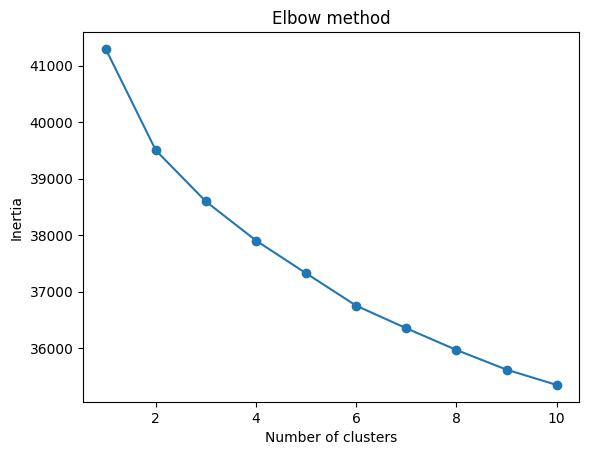

In [15]:
from sklearn.cluster import KMeans

doc_vectors_list = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(doc_vectors_list)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [5]:
num_clusters = 5
cluster_indices = [i for i in range(num_clusters)]

In [16]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(doc_vectors_list)

KMeans(n_clusters=5)

In [103]:
#find centroids. compute bigram closest to centroid

In [17]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.23135996, -0.27867855,  0.04067136,  0.0874149 ,  0.08943604,
        -0.29736476,  0.01573718,  0.34582738, -0.28292874, -0.13303138,
        -0.16972689,  0.25850734, -0.08748971,  0.01022345, -0.30171691,
         0.15486257,  0.45498758, -0.53606334,  0.02478956, -0.07627008,
         0.20079241,  0.25570831, -0.08054999, -0.04670786,  0.512581  ,
        -0.34448177,  0.04061389, -0.01431747, -0.52210607, -0.4450004 ,
        -0.23570056,  0.43502233,  0.2456902 , -0.04926853,  0.24403341,
         0.15579833,  0.17901234,  0.13945582, -0.08983923,  0.08811467,
         0.15680049,  0.08544706, -0.46349005,  0.2742115 ,  0.05653327,
        -0.09518162, -0.43568599, -0.27374712,  0.24724599,  0.15384661],
       [ 0.13415569, -0.33524425, -0.0217452 , -0.09837625, -0.0735908 ,
        -0.45671137, -0.13824078,  0.2479425 , -0.21341857, -0.0789507 ,
         0.07246126,  0.22485061,  0.1730653 ,  0.08941026, -0.31183719,
         0.26981328,  0.2918307 , -0.48242692,  0.

In [18]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[1.1258516880363258,
 0.874428947045521,
 0.8743951926030076,
 1.3349411410343441,
 0.9530953329689994,
 0.9837224098334019,
 1.4308864472440694,
 0.9588567412624512,
 1.1326854516270368,
 1.1946800729822165]

In [19]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(list(doc_vectors.values()))
explained_variance = pca.explained_variance_ratio_

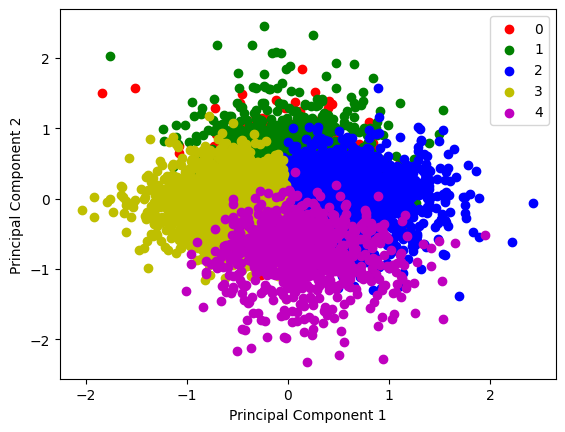

In [20]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b", "y","m"]
for index, color in zip(cluster_indices, colors):
    pca_fit_cluster = [pt[0] for pt in pca_labeled if pt[1] == index]
    pca_fit_i_x = np.array(pca_fit_cluster).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_cluster).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=index)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [21]:
#a selection of poliical words 
political_keywords = list(pd.read_csv("political_keywords.csv"))

In [22]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [23]:
#get a list of political bigrams directly
political_bigrams = list(pd.read_csv("political_bigrams.csv"))

In [24]:
political_bigrams[:10]

['economic policy',
 'foreign affairs',
 'national security',
 'civil rights',
 'social justice',
 'tax reform',
 'health care',
 'immigration law',
 'gun control',
 'climate change']

In [25]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in political_bigrams}

In [26]:
list(bigram_vecs.values())[0]

array([ 0.18174763, -0.3246231 , -0.03380175, -0.03835405, -0.06431765,
       -0.33713964,  0.01350682,  0.30746108, -0.20330639, -0.13352445,
       -0.06678377,  0.16378209, -0.04100685,  0.01793795, -0.30574065,
        0.26768294,  0.10724487, -0.49511763,  0.19371611, -0.15606515,
        0.12703009,  0.4177891 , -0.05557637, -0.08064646,  0.31497517,
       -0.23156162,  0.0811021 , -0.07478741, -0.3299978 , -0.32360914,
       -0.1694283 ,  0.468585  ,  0.09788799, -0.07088753,  0.16093525,
       -0.03693102,  0.03119894,  0.0516943 , -0.08264256, -0.10555688,
        0.15270059,  0.15262994, -0.1968541 ,  0.29807657, -0.05579062,
       -0.1508927 , -0.29718477, -0.27455637,  0.3036284 ,  0.12211794],
      dtype=float32)

In [27]:
#define cosine similarity
from numpy.linalg import norm
def cosine_similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [28]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2**32
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        #dist = cosine_similarity(centroid, embedding)
        dist = np.linalg.norm(centroid - embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [29]:
nearest_bigram_to_centroid

[('middle class', 0.6654505069368333),
 ('national security', 0.8001603770556059),
 ('public parks', 0.3778462050474415),
 ('social security', 0.6571587530145261),
 ('national security', 1.053626894863364)]

In [30]:
for comment in sample_data[:10]:
    print(comment)

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF‚Ä¶
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on ‚Ä¶
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co‚Ä¶
RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://‚Ä¶
Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate
Deer in the headlights RT @liz

In [31]:
#label the data with the appropriate label from k-means clustering
labeled_data = list(zip(sample_data,kmeans.labels_))

In [32]:
#separate documents by label. build vocabulary for each cluster
cluster_vocab = [[] for label in cluster_indices]
cluster_docs = [[] for label in cluster_indices]
for doc, label in labeled_data:
    cluster_vocab[label] += word_tokenize(doc.lower())
    cluster_docs[label].append(doc)

In [123]:
#METHOD 2) use word embeddings to compute distance from word to list of words, take closest words

In [31]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [32]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [33]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).cosine_similarity(nlp(word)) for word in wordset])

In [34]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_17452/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.2748392664312949

In [38]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [39]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)

In [52]:
#METHOD 3: Use TF-IDF on each cluster to extract top two words
from sklearn.feature_extraction.text import TfidfVectorizer
def top_words_in_cluster(cluster_index,num_words=10):
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
    corpus_tfidf = tfidf_vectorizer.fit_transform(cluster_docs[cluster_index])
    tfidf_df = pd.DataFrame(corpus_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
    tfidf_scores = tfidf_df.sum(axis=0)
    return tfidf_scores.nlargest(n=num_words)

In [56]:
for word, score in top_words_in_cluster(0).items():
    print(f"{word}:{score}")

gopdebates:49.05496942989295
http:33.91350515984912
üá:32.7554466239184
trump:31.94773220905377
like:31.709366860917545
amp:28.849321398549176
foxnews:28.793958889859972
realdonaldtrump:28.083727819300297
rwsurfergirl:25.16474243001494
night:24.478802480247573


In [61]:
for word, score in top_words_in_cluster(0).items():
    print(f"({word},{score})")
print("<br>")

(gopdebates,49.05496942989295)
(http,33.91350515984912)
(üá,32.7554466239184)
(trump,31.94773220905377)
(like,31.709366860917545)
(amp,28.849321398549176)
(foxnews,28.793958889859972)
(realdonaldtrump,28.083727819300297)
(rwsurfergirl,25.16474243001494)
(night,24.478802480247573)
<br>
